In [1]:
import numpy as np #matrix manipulation (matricies = multidimentional arrays)
import matplotlib.pyplot as plt #graph visualization
import sklearn #ML
import pandas as pd #data analysis - I prefer numpy, but it can be useful 

# Data Preprocessing
Get data from excel, assign arrays, etc


In [2]:
#gather from excel
data_pandas = pd.read_csv('Plane_Crashes.csv')

labels = np.array(["Date", "Time", "Location", "Flight Number", 
                   "Route", "Registration", "Aboard", 
                   "Fatalities", "Ground", "Summary"])
data_pandas



,Date,Time,Location,Operator,Flight #,Route,Type,Registration,Aboard,Fatalities,Ground,Summary,N/A
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",NaN
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,NaN
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,NaN
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,NaN
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5/20/2009,6:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,112.0,98.0,2.0,"While on approach, the military transport cras...",NaN
5264,5/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,NaN
5265,6/1/2009,0:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,NaN
5266,6/7/2009,8:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,1.0,1.0,0.0,The air ambulance crashed into hills while att...,NaN


In [3]:
#convert to numpy for easier manipulation
data = data_pandas.to_numpy()[:,:-1] #remove random last column
data = np.nan_to_num(data)

In [4]:
#Assign data to rows

full_dates = data[:, 0]
months = np.zeros(data.shape[0], dtype = 'int')
days = np.zeros(data.shape[0], dtype = 'int')
years = np.zeros(data.shape[0], dtype = 'int')
for m in range(data.shape[0]):
    ind = full_dates[m].split('/')
    months[m] = ind[0]
    days[m] = ind[1]
    years[m] = ind[2]
times = data[:, 1]
locations = data[:, 2]
operator = data[:,3]
route = data[:,5]
plane_type = data[:,6]
aboard = data[:,8]
fatalities = data[:,9]
grounds = data[:, 10]
summaries = data[:,11]


# Exploratory Data Analysis

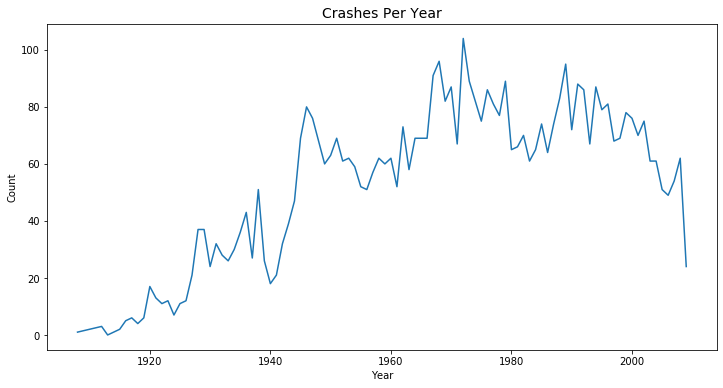

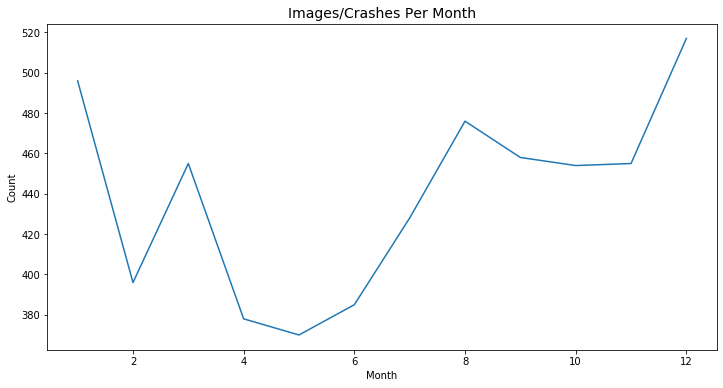

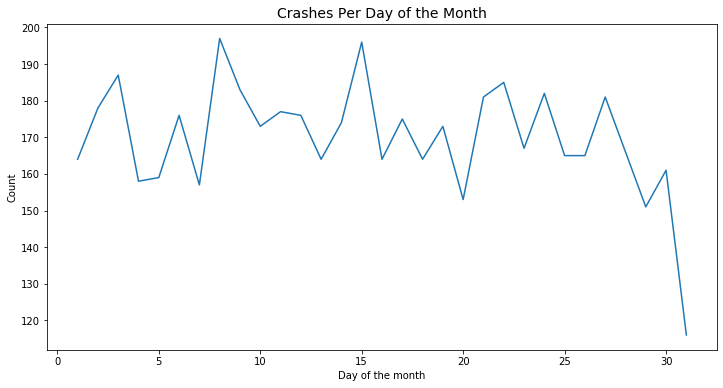

In [11]:
#Crashes per year, month, and date

plt.figure(figsize=(12,6))
plt.plot(np.unique(years), np.bincount(years)[1912:])
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Crashes Per Year', loc='Center', fontsize=14)

plt.savefig('crashes_per_year.png', bbox_inches='tight')
plt.show()

#Crashes per year, month, and date
plt.figure(figsize=(12,6))
plt.plot(np.unique(months), np.bincount(months)[1:])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Images/Crashes Per Month', loc='Center', fontsize=14)
plt.savefig('crashes_per_month.png', bbox_inches='tight')
plt.show()
#Crashes per year, month, and date
plt.figure(figsize=(12,6))
plt.plot(np.unique(days), np.bincount(days)[1:])
plt.xlabel('Day of the month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Crashes Per Day of the Month', loc='Center', fontsize=14)
plt.savefig('crashes_per_day.png', bbox_inches='tight')
plt.show()

#is dip in month due to less traveling??

1
2
3
4
5
6
7


C:\Users\Chinmay\anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


8


C:\Users\Chinmay\anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Chinmay\anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


9
10
11
12


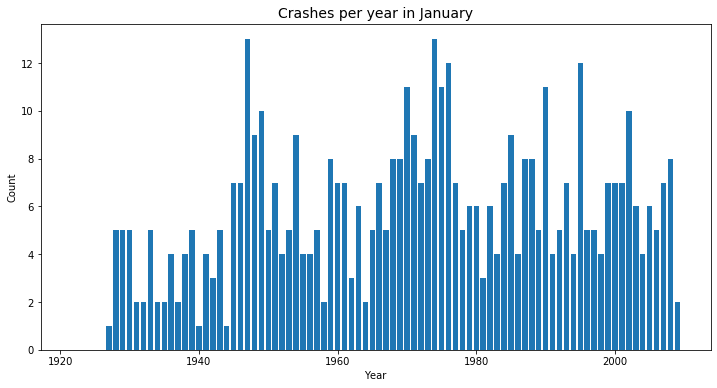

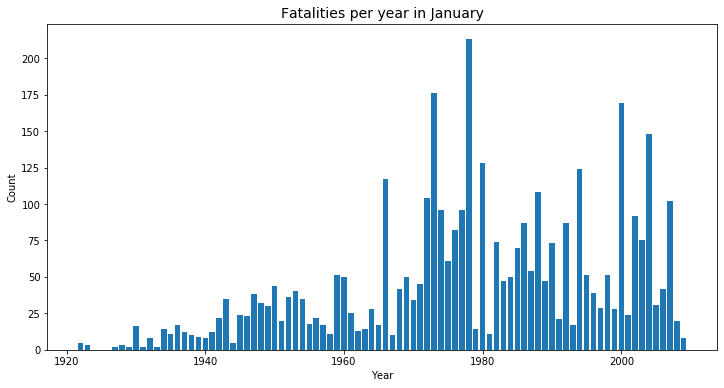

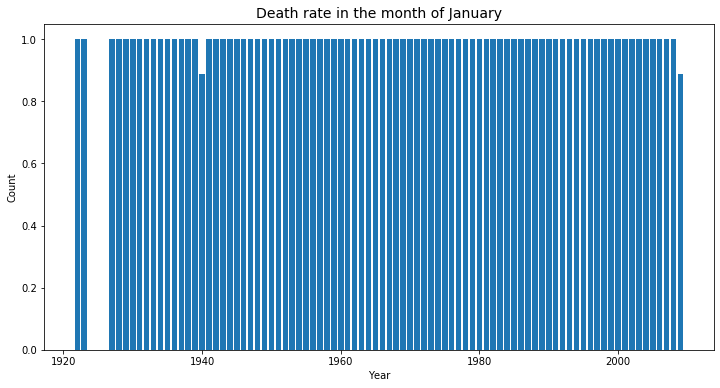

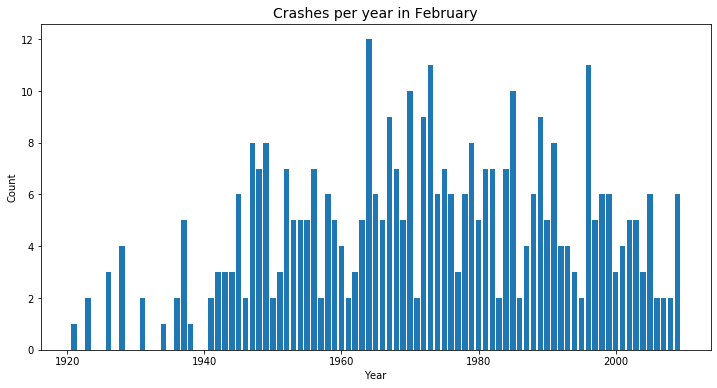

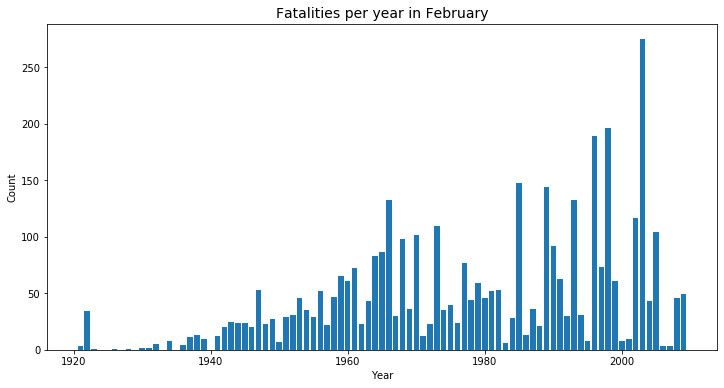

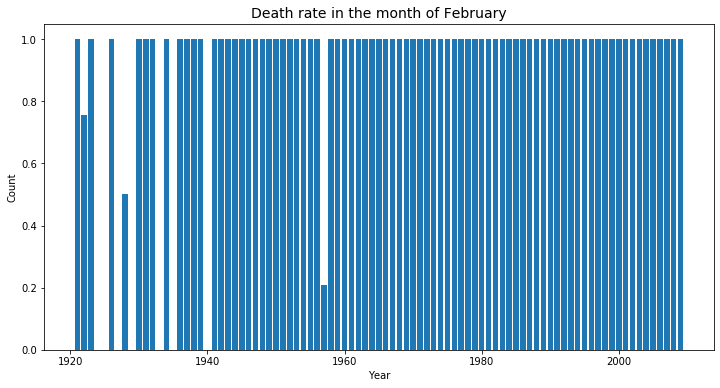

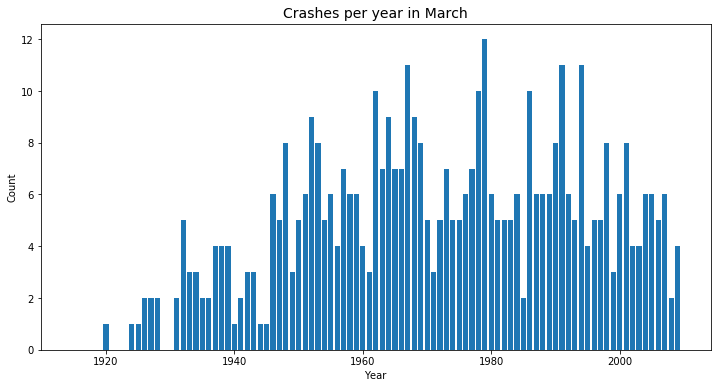

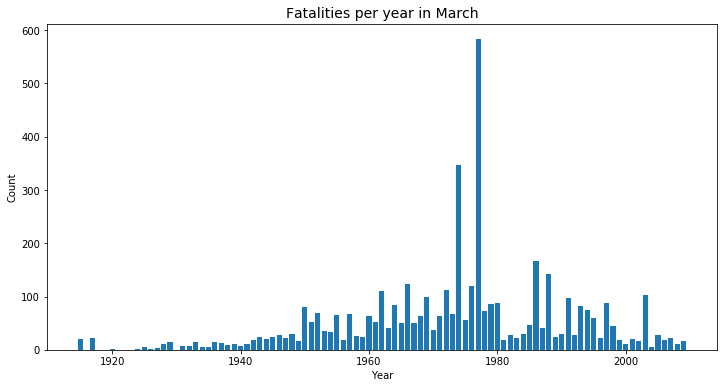

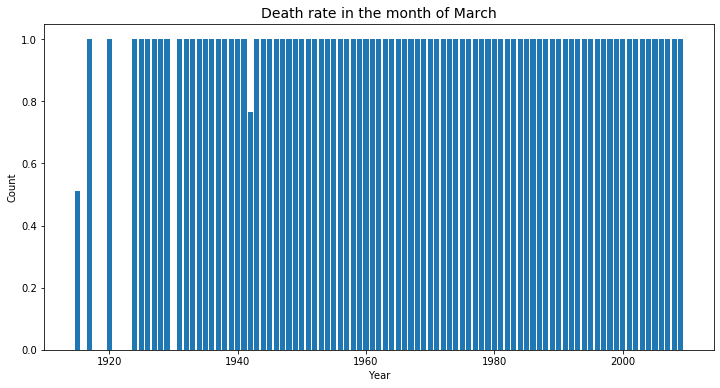

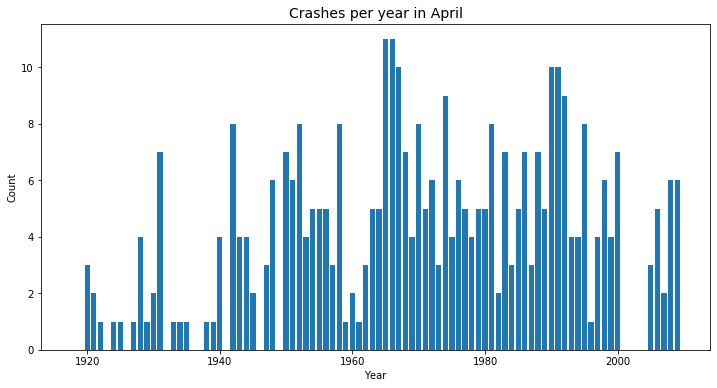

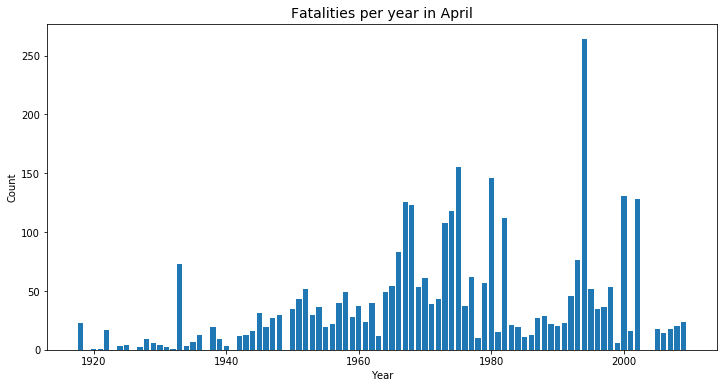

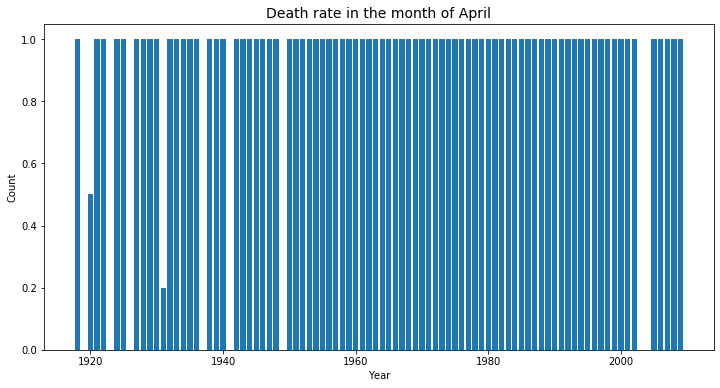

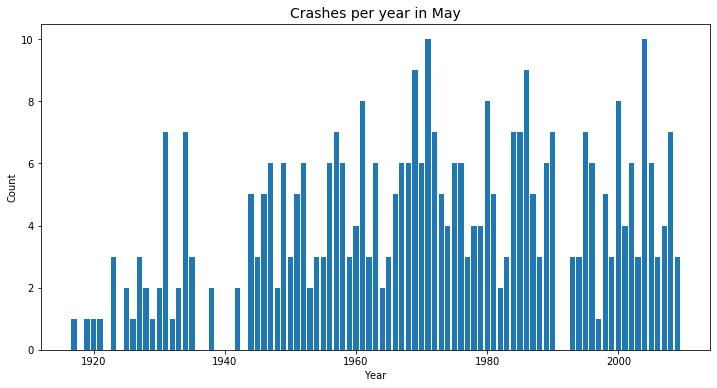

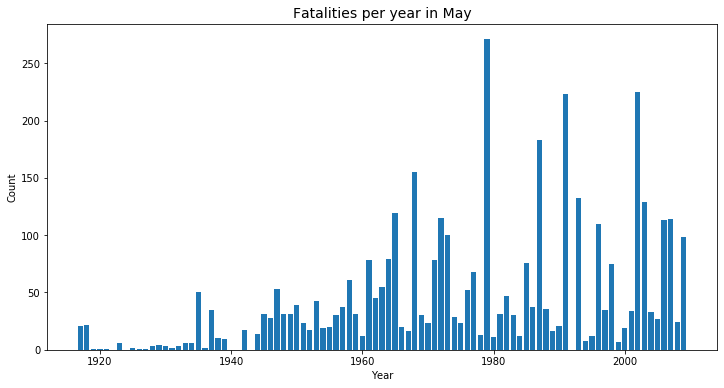

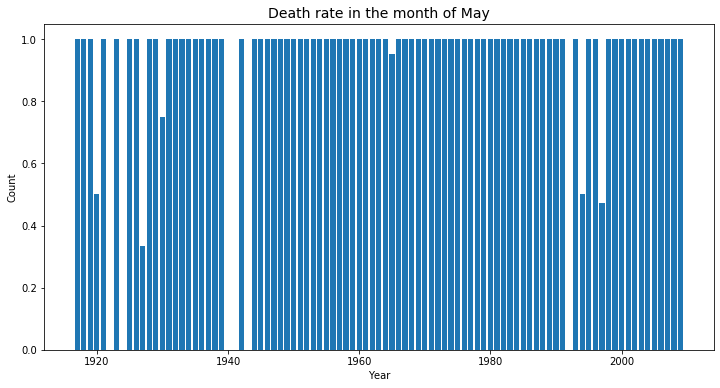

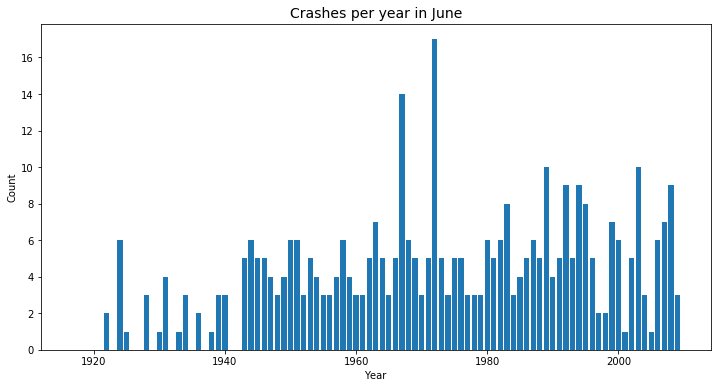

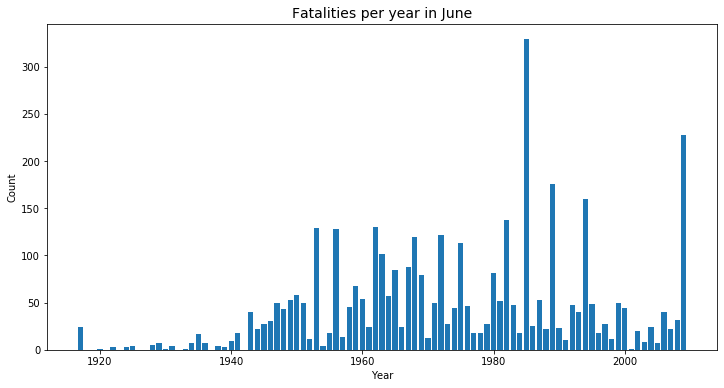

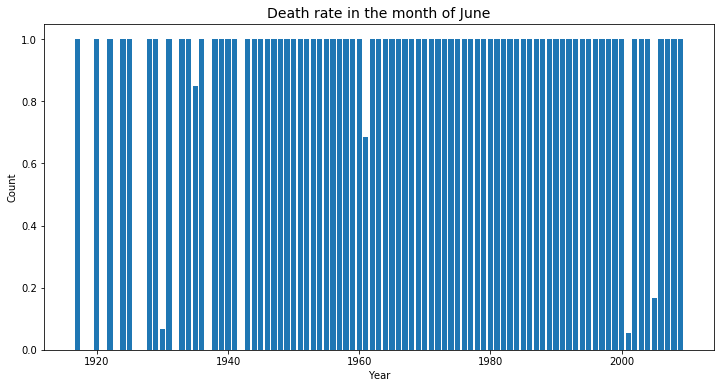

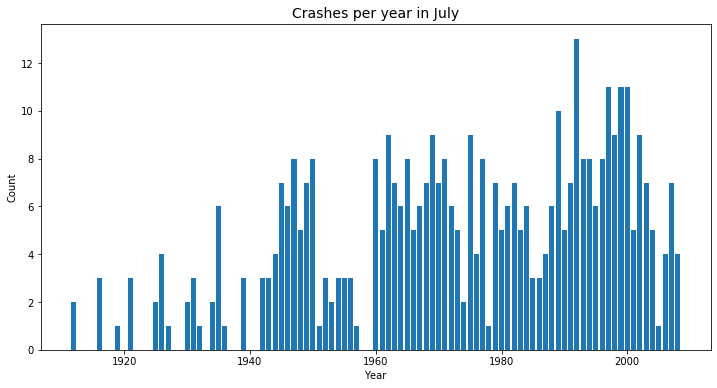

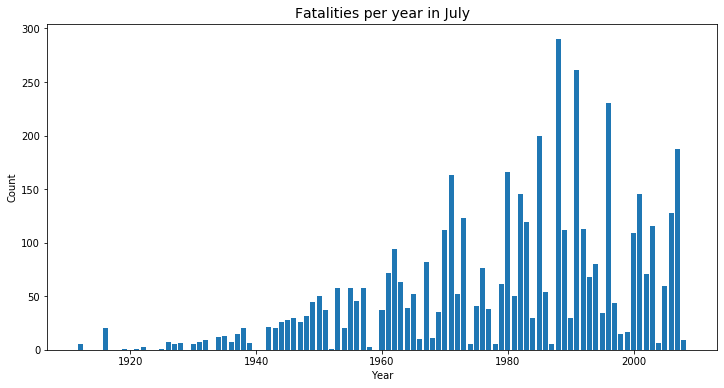

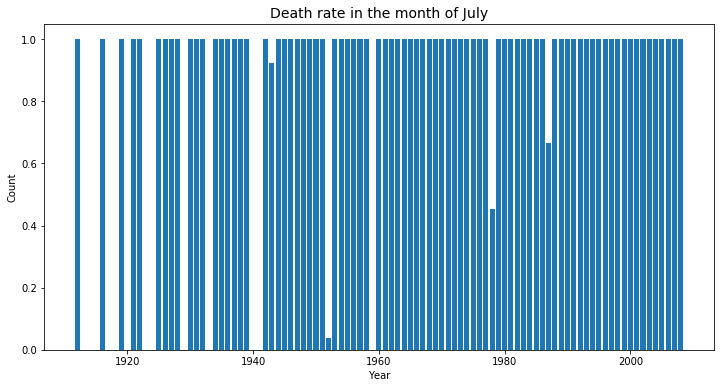

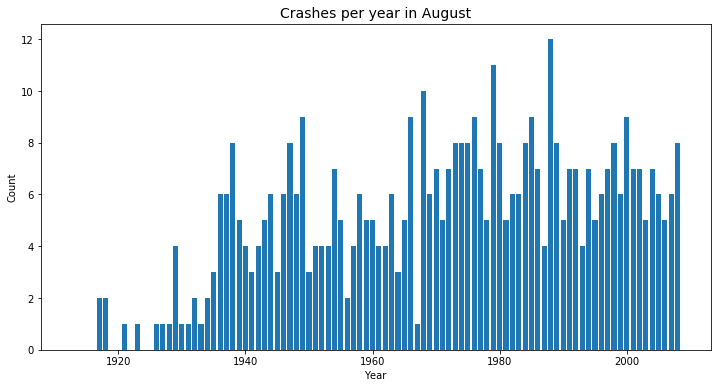

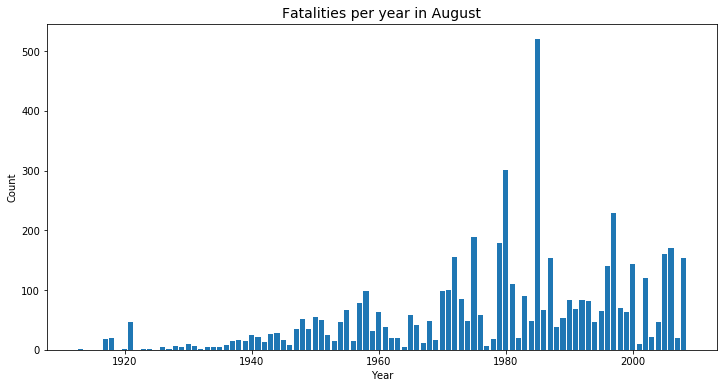

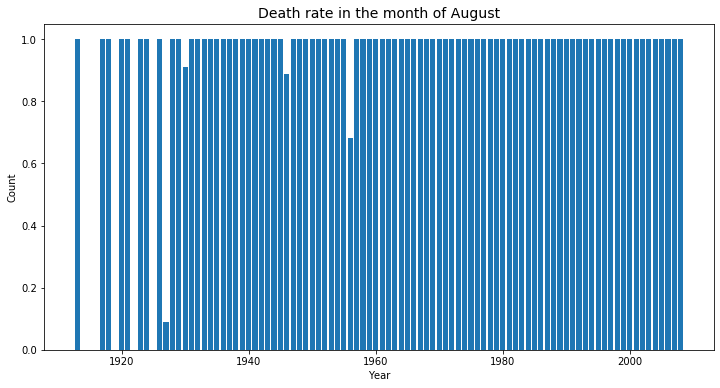

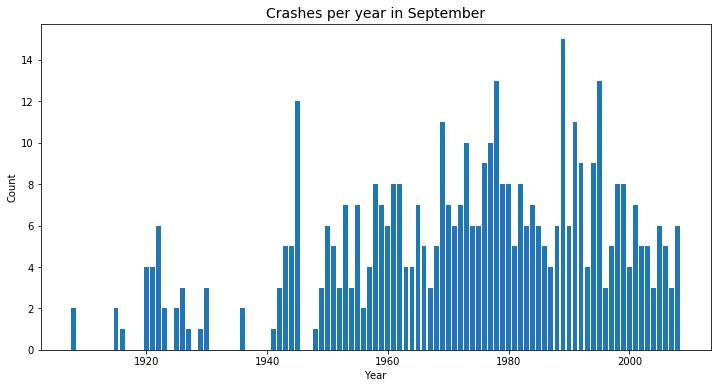

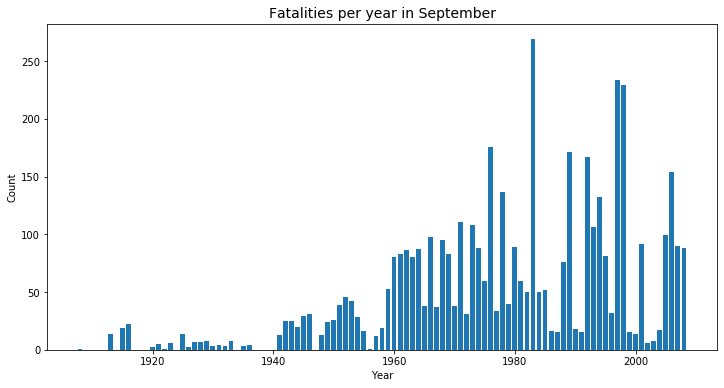

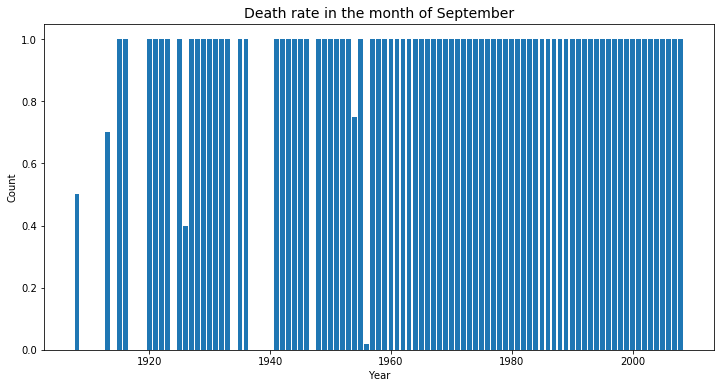

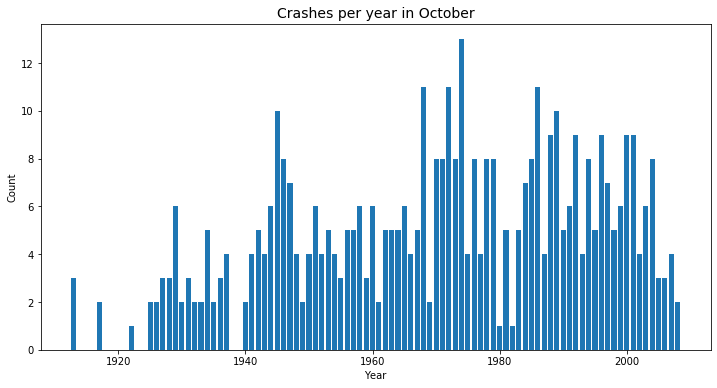

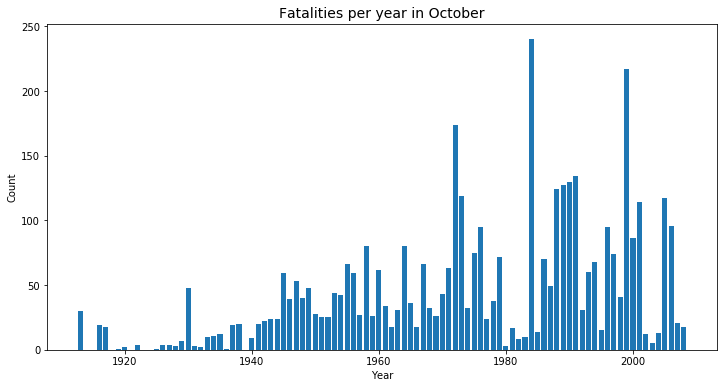

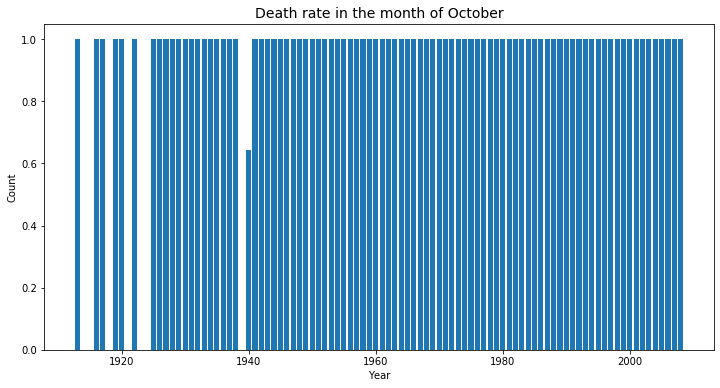

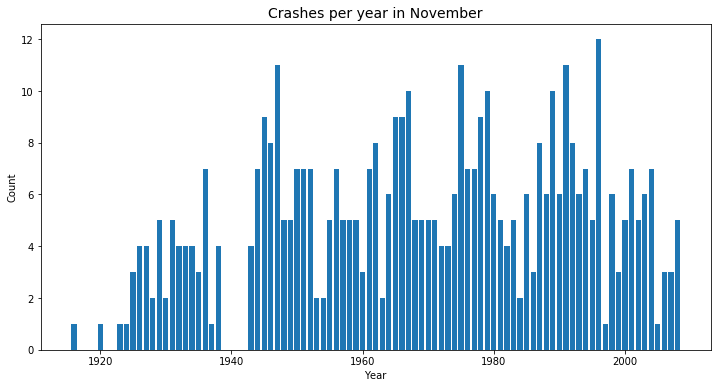

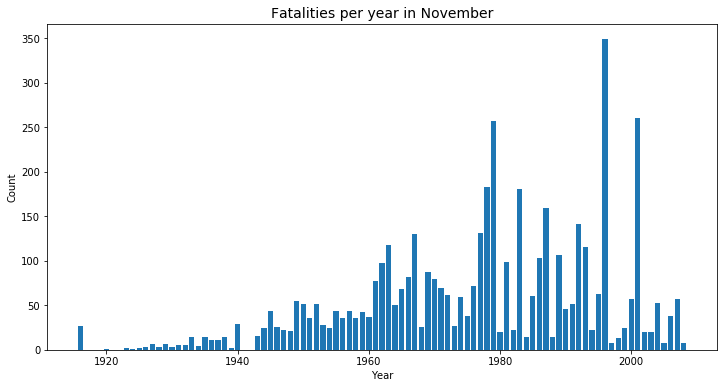

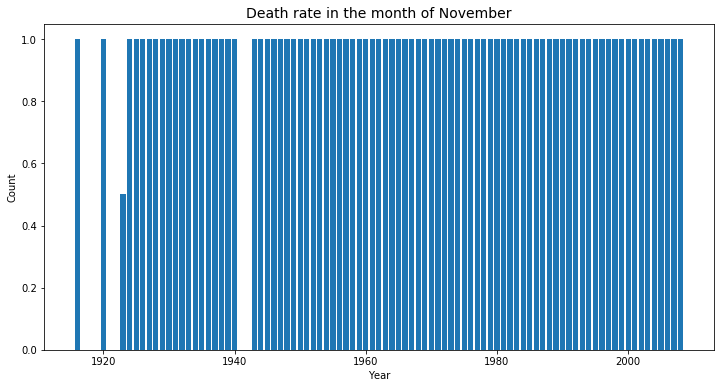

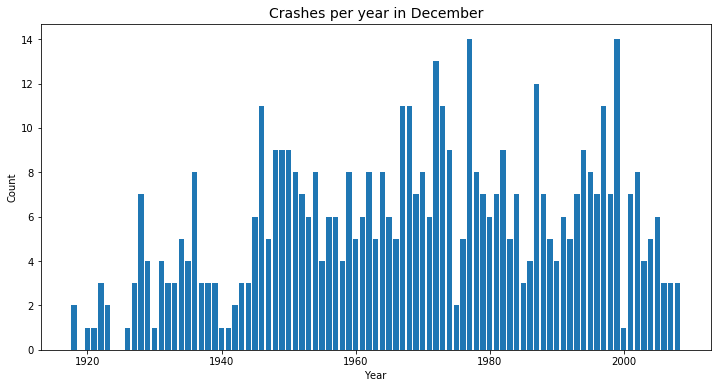

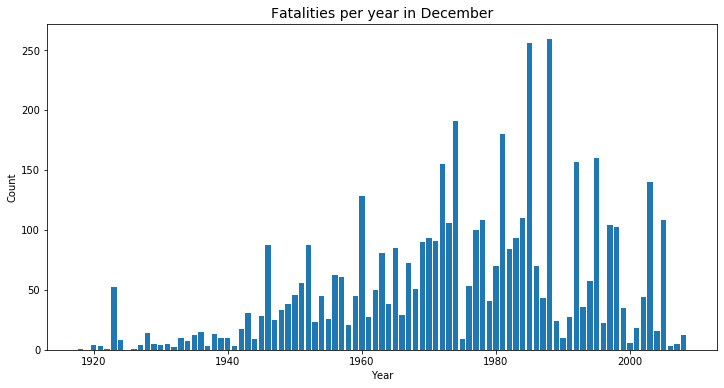

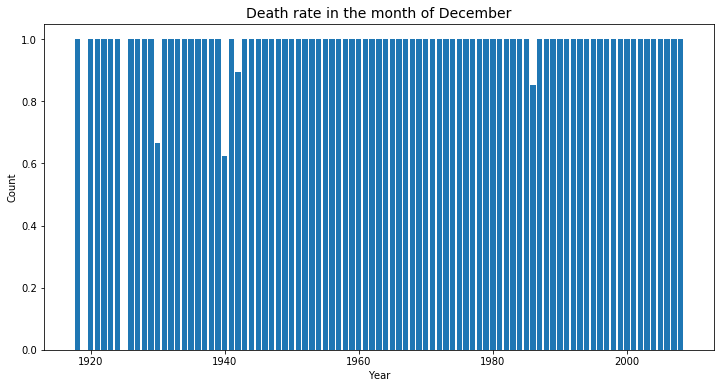

In [10]:
#Number of crashes per year for each month
all_items = np.vstack((months, years, fatalities, aboard)).T
all_items_sorted = all_items[all_items[:,0].argsort()]
for i in range(5):
    np.append(all_items_sorted, np.array([0,0,0,0]))
#months_years = np.sort(months_years,axis = 0)
month_vals = ["January","February","March","April","May","June","July","August","September","October","November","December"]

total = 0
for i in range(1,13):
    month_ind = np.where(all_items_sorted[:,0] == i)[0].shape[0]

    arr = all_items_sorted[total:total+month_ind]
    total += month_ind

    curr = arr

    #remove all nans
    nans = []
    if i == 4:
        rr = 377
    elif i == 5:
        rr = 369
    elif i == 6:
        rr = 385
    else:
        rr = 394
    print(i)
    for j in range(rr):
        if np.isnan(curr[j, 2]):
            curr = np.delete(curr, j , 0)
        if np.isnan(curr[j, 3]):
            curr = np.delete(curr, j , 0)
        if curr[j,3] == np.float(0):
            curr[j,3] = 99999999
            
    x_val = np.unique(curr[:,1]) #all the years
    y_val_num_crashes = np.bincount(np.array(curr[:,1].T, dtype = 'int64'))[-len(x_val):]

    if i == 11:
        curr[:,2][-15] = 0
        curr[:,3][-15] = 999999
    if i == 12:
        for ii in range(len(curr[:,3])):
            if np.isnan(curr[:,3][ii]):
                curr[:,3][ii] = 999999
        for ii in curr[:,2]:
            if np.isnan(ii):
                curr[:,2][ii] = 0

    y_val_num_fatalities = np.bincount(np.array(curr[:,2].T, dtype = 'int64'))
    y_val_num_aboard = np.bincount(np.array(curr[:,3].T, dtype = 'int64'))


    plt.figure(figsize=(12,6))
    plt.bar(x_val, y_val_num_crashes)
    plt.xlabel("Year", fontsize=10)
    plt.ylabel('Count', fontsize=10)
    s = "Crashes per year in " + month_vals[i-1]
    
    plt.title(s, loc='Center', fontsize=14)
    plt.savefig(s + '.png', bbox_inches='tight')

    plt.figure(figsize=(12,6))
    plt.bar(curr[:,1], curr[:,2])
    plt.xlabel("Year", fontsize=10)
    plt.ylabel('Count', fontsize=10)
    s = "Fatalities per year in " + month_vals[i-1]
    plt.title(s, loc='Center', fontsize=14)

    plt.savefig(s + '.png', bbox_inches='tight')

    plt.figure(figsize=(12,6))
    plt.bar(curr[:,1], np.nan_to_num(curr[:,2] / curr[:,3]))
    plt.xlabel("Year", fontsize=10)
    plt.ylabel('Count', fontsize=10)
    s = "Death rate in the month of " + month_vals[i-1]
    plt.title(s, loc='Center', fontsize=14)

    plt.savefig(s + '.png', bbox_inches='tight')
    


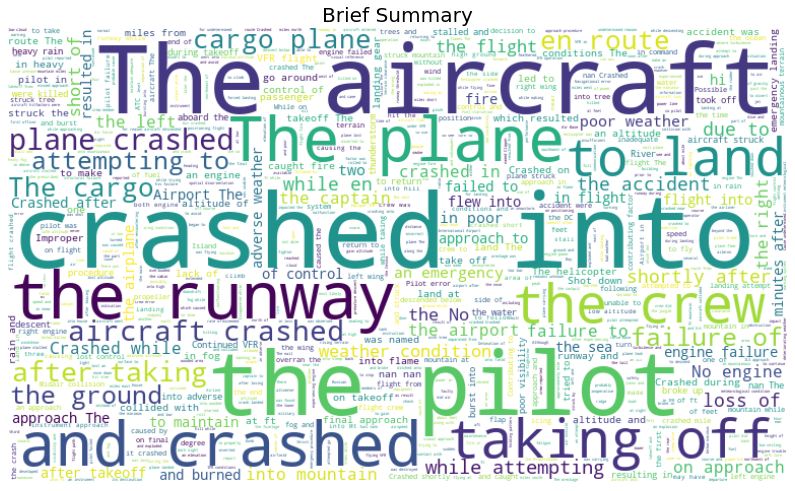

In [19]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(data_pandas.Summary.tolist())
plane_mask = np.array(Image.open('airplane.png'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(14,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=20)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

In [23]:
text = []
for s in summaries:
    if type(s) == float:
        pass
    else:
        text.append(s.replace('.', ' ').replace(':',' ').replace(',',' ').replace(';',' ').split())


[['During', 'a', 'demonstration', 'flight', 'a', 'U', 'S', 'Army', 'flyer', 'flown', 'by', 'Orville', 'Wright', 'nose-dived', 'into', 'the', 'ground', 'from', 'a', 'height', 'of', 'approximately', '75', 'feet', 'killing', 'Lt', 'Thomas', 'E', 'Selfridge', 'who', 'was', 'a', 'passenger', 'This', 'was', 'the', 'first', 'recorded', 'airplane', 'fatality', 'in', 'history', 'One', 'of', 'two', 'propellers', 'separated', 'in', 'flight', 'tearing', 'loose', 'the', 'wires', 'bracing', 'the', 'rudder', 'and', 'causing', 'the', 'loss', 'of', 'control', 'of', 'the', 'aircraft', 'Orville', 'Wright', 'suffered', 'broken', 'ribs', 'pelvis', 'and', 'a', 'leg', 'Selfridge', 'suffered', 'a', 'crushed', 'skull', 'and', 'died', 'a', 'short', 'time', 'later'], ['First', 'U', 'S', 'dirigible', 'Akron', 'exploded', 'just', 'offshore', 'at', 'an', 'altitude', 'of', '1', '000', 'ft', 'during', 'a', 'test', 'flight'], ['The', 'first', 'fatal', 'airplane', 'accident', 'in', 'Canada', 'occurred', 'when', 'Americ